In [1]:
import pandas as pd

In [105]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [90]:
import seaborn as sns

In [5]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.shape

(7176, 4)

In [7]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [8]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [9]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [11]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country','Year':'Year','Value':"GDP_Per_Capita"})

In [12]:
gdp_df.Country.value_counts()

Country
Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: count, Length: 242, dtype: int64

In [13]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [14]:
country_count=gdp_df.Country.value_counts().to_frame().reset_index()
country_count

,Country,count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [15]:
country_count.query('count==31')

,Country,count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


In [16]:
missing_counts=country_count.query('count!=31')
missing_counts

,Country,count
205,Turkmenistan,30
206,Hungary,30
207,Slovak Republic,29
208,Cambodia,28
209,West Bank and Gaza,27
210,Bosnia and Herzegovina,27
211,Slovenia,26
212,Latvia,26
213,Israel,26
214,Lithuania,26


In [17]:
missing_counts.shape

(37, 2)

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [18]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [19]:
year_data_2020=gdp_df.query('Year==2020')
year_data_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


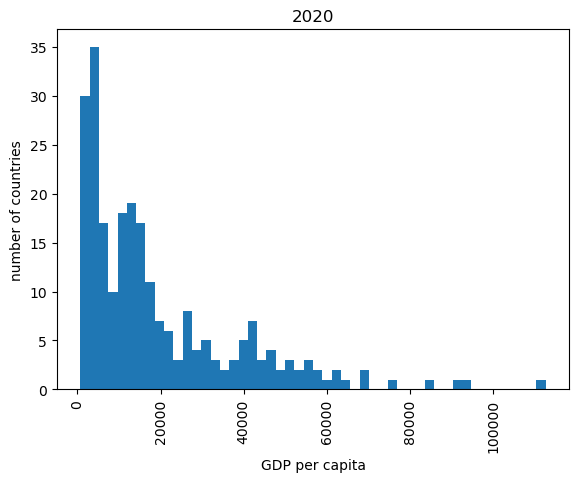

In [20]:
ax= year_data_2020.hist('GDP_Per_Capita','Year',bins=50)
ax.set_xlabel("GDP per capita")
ax.set_ylabel("number of countries")
plt.show()

C:\Users\willi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


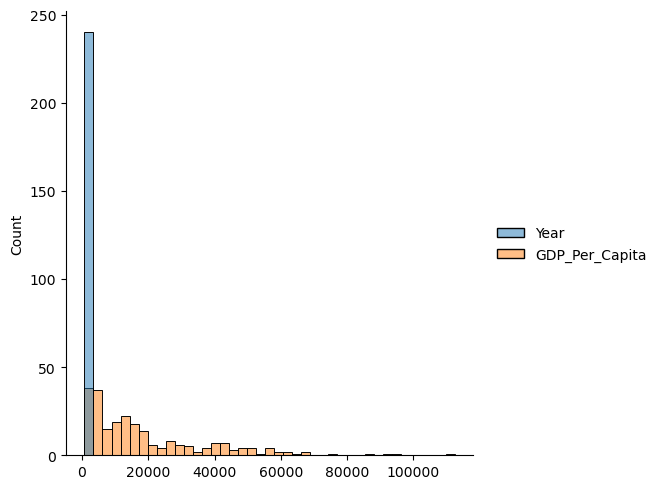

In [21]:
sns.displot(year_data_2020)

C:\Users\willi\AppData\Local\Temp\ipykernel_8468\3549261803.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(year_data_2020)


<Axes: ylabel='Density'>

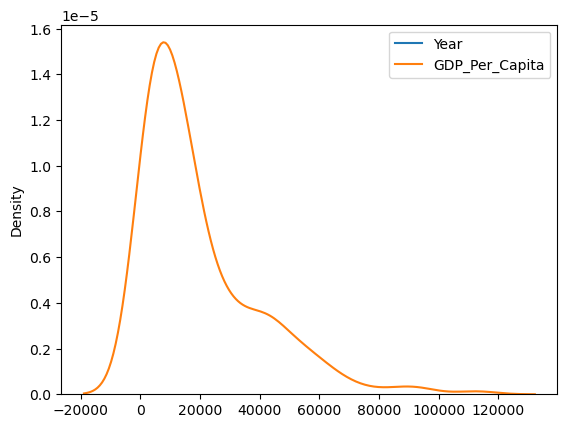

In [22]:
sns.kdeplot(year_data_2020)

<Axes: >

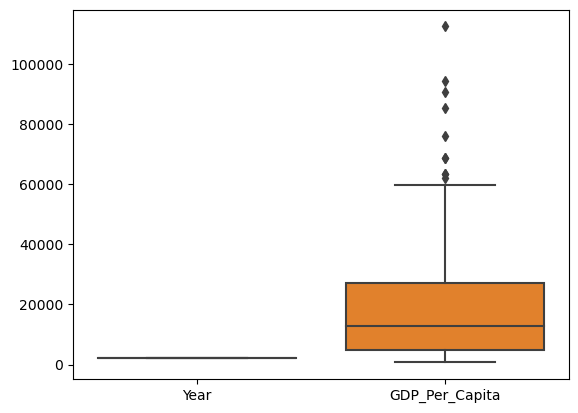

In [23]:
sns.boxplot(year_data_2020)

<Axes: >

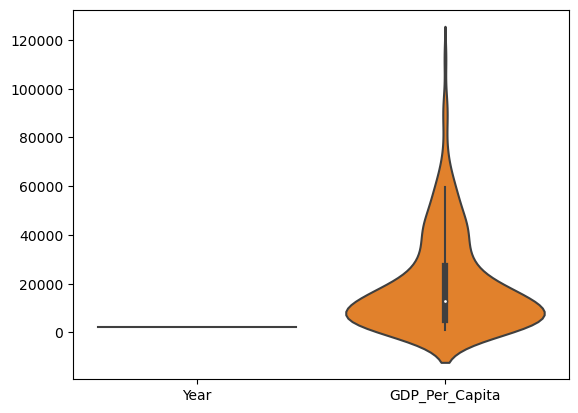

In [24]:
sns.violinplot(year_data_2020)

#9 median GDP per capita value in 2020

In [25]:
gdp_2020=year_data_2020
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [26]:
np.median(gdp_2020.GDP_Per_Capita)

12908.9374056206

10, compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [27]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


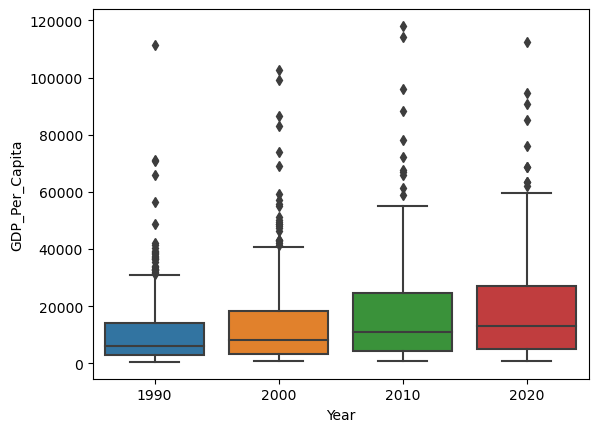

In [29]:
sns.boxplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

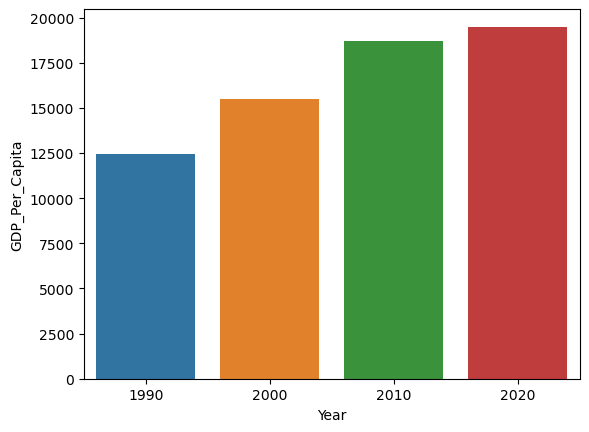

In [32]:
sns.barplot(x='Year',y='GDP_Per_Capita',data=gdp_decades,errorbar=None)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

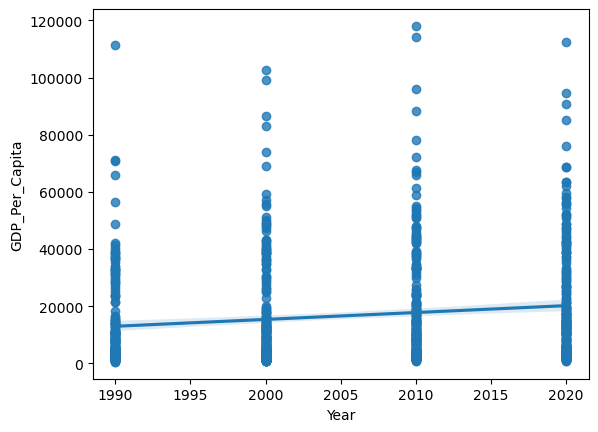

In [34]:
sns.regplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

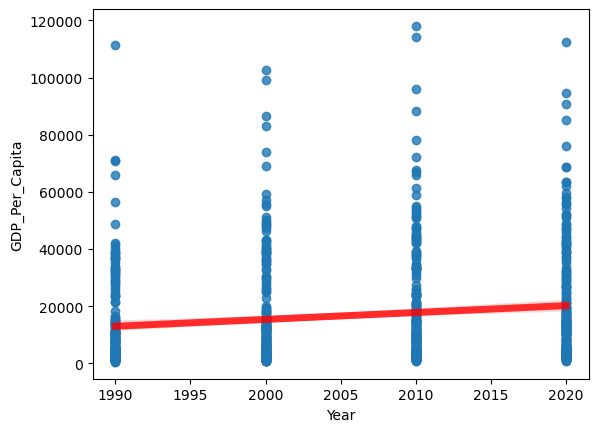

In [35]:
sns.regplot(x=gdp_decades['Year'], y= gdp_decades['GDP_Per_Capita'], line_kws = {'color':'r', 'alpha': 0.8, 'lw': 5})
plt.show()

# 11 Which country was the first to have a GDP per capita greater than $100,000?

In [39]:
gdp_sort=gdp_df.sort_values(by=['Year','Country'],ascending=True)
gdp_sort=gdp_sort.reset_index(drop=True)
gdp_sort

,Country,Year,GDP_Per_Capita
0,Africa Eastern and Southern,1990,3083.976800
1,Africa Western and Central,1990,2810.341129
2,Albania,1990,4827.034551
3,Algeria,1990,8746.340762
4,Angola,1990,5758.950488
...,...,...,...
7171,Vietnam,2020,10338.270543
7172,West Bank and Gaza,2020,5402.538773
7173,World,2020,16269.969854
7174,Zambia,2020,3277.816510


In [42]:
first_100k=gdp_sort.loc[gdp_sort.GDP_Per_Capita>=100000]
first_100k.head()

,Country,Year,GDP_Per_Capita
195,United Arab Emirates,1990,111454.055665
402,United Arab Emirates,1991,106103.552655
610,United Arab Emirates,1992,103470.924576
1029,United Arab Emirates,1994,100213.156226
1251,United Arab Emirates,1995,101570.992100


#12 Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [43]:
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [45]:
gdp_2020= gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)
gdp_2020

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057
...,...,...,...
4750,Niger,2020,1221.269930
5871,Somalia,2020,1180.965971
1524,Dem. Rep. Congo,2020,1082.445242
1136,Central African Republic,2020,937.856470


In [46]:
gdp_Luxembourg = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']
gdp_Luxembourg

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


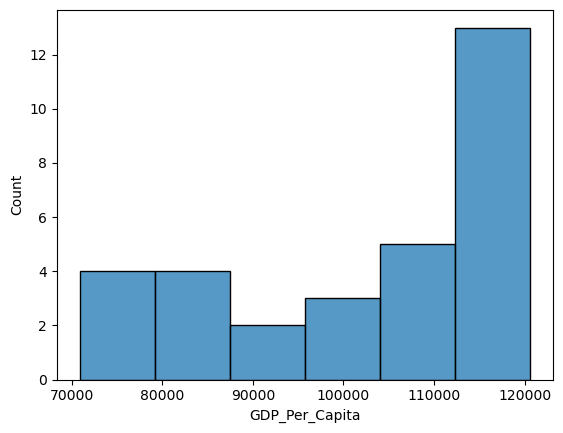

In [47]:
sns.histplot(data= gdp_Luxembourg, x= 'GDP_Per_Capita')
plt.show()

#13Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [48]:
 gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470
1524,Dem. Rep. Congo,2020,1082.445242
5871,Somalia,2020,1180.965971
4750,Niger,2020,1221.269930
...,...,...,...
639,Bermuda,2020,76105.138057
5381,Qatar,2020,85290.450430
3071,Ireland,2020,90789.221024
5720,Singapore,2020,94505.636160


In [49]:
gdp_Burundi = gdp_df.loc[gdp_df['Country'] == 'Burundi']
gdp_Burundi

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340
919,Burundi,2015,825.205574
920,Burundi,2014,886.235296
921,Burundi,2013,877.272857
922,Burundi,2012,862.715651
923,Burundi,2011,852.502576


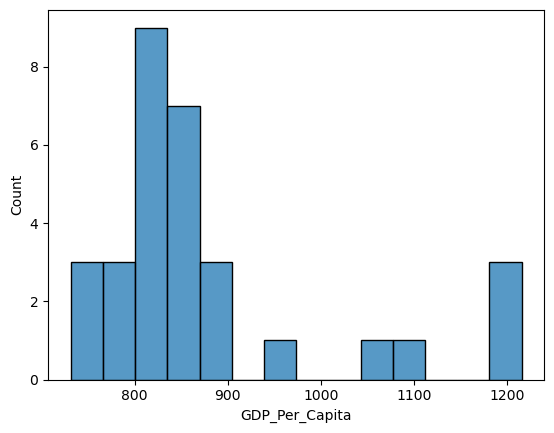

In [50]:
sns.histplot(data= gdp_Burundi, x= 'GDP_Per_Capita')
plt.show()

#14

In [56]:
internet_df= pd.read_csv('../data/internet_use.csv', nrows = 4495,dtype={'Country or Area':object,'Year':int,'Value Footnotes':object})
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [57]:
internet_df.dtypes

Country or Area     object
Year                 int32
Value              float64
Value Footnotes     object
dtype: object

#15

In [58]:
internet_df= internet_df.drop(columns = 'Value Footnotes')
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [59]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Value': 'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


#16

In [61]:
Internet_years=internet_df.Year.value_counts()
Internet_years

Year
1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: count, dtype: int64

#17

In [63]:
non_zero = internet_df.loc[internet_df['Internet_Users_Pct'] > 0]
non_zero

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684


In [67]:
non_zero=non_zero.sort_values(by ='Year', ascending = True)
non_zero.head()

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
204,Australia,1990,0.585095
728,Canada,1990,0.361000
1535,Germany,1990,0.125892
4276,United Kingdom,1990,0.087355


#18

In [68]:
internet_differ = internet_df.loc[internet_df['Year'].isin ([2000, 2014])]
internet_differ

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

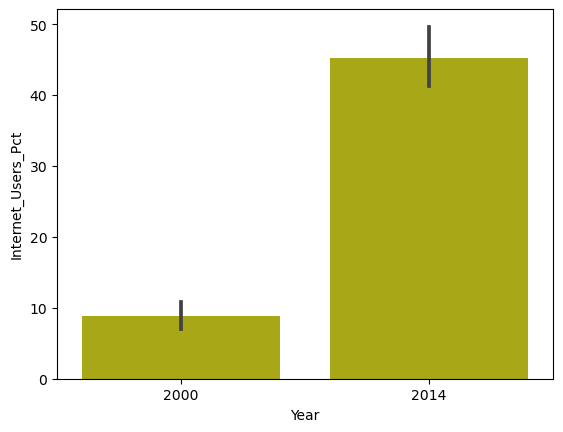

In [71]:
sns.barplot(x='Year',y='Internet_Users_Pct',data=internet_differ,color='y')

#19

In [75]:
below_5_2014=internet_df.loc[(internet_df.Year == 2014) & (internet_df.Internet_Users_Pct<5)] 
below_5_2014

,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


In [78]:
below_5_2014.shape

(16, 3)

#20

In [82]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, left_on= ['Country', 'Year'], right_on= ['Country','Year'], how='inner')
gdp_and_internet_use


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.384604,6.390000
1,Afghanistan,2013,2116.465258,5.900000
2,Afghanistan,2012,2075.491614,5.454545
3,Afghanistan,2011,1904.559926,5.000000
4,Afghanistan,2010,1957.029070,4.000000
...,...,...,...,...
3410,Zimbabwe,1997,2856.118188,0.033080
3411,Zimbabwe,1996,2808.558556,0.016790
3412,Zimbabwe,1995,2573.993785,0.007684
3413,Zimbabwe,1994,2603.927369,0.001739


#21

In [83]:
gdp_and_internet_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.384604,6.39
13,Albania,2014,11586.833878,60.10
34,Algeria,2014,11512.690472,18.09
56,Angola,2014,8240.347981,21.26
76,Antigua and Barbuda,2014,18104.683788,64.00
...,...,...,...,...
3308,Uruguay,2014,22419.043746,61.46
3330,Uzbekistan,2014,6075.192224,43.55
3351,Vanuatu,2014,2984.243485,18.80
3371,Zambia,2014,3450.037600,17.34


In [84]:
gdp_and_internet_2014= gdp_and_internet_2014.sort_values( 'Internet_Users_Pct', ascending = False).head(3)
gdp_and_internet_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1372,Iceland,2014,50450.741612,98.16
372,Bermuda,2014,77361.104881,96.80
2277,Norway,2014,62390.130313,96.30


In [88]:
top_country = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(gdp_and_internet_2014.Country)&
                                       (gdp_and_internet_use.GDP_Per_Capita>0)]
top_country

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
372,Bermuda,2014,77361.104881,96.800000
373,Bermuda,2013,80503.650291,95.300000
374,Bermuda,2012,80982.367755,91.299305
375,Bermuda,2011,85829.378260,88.336000
376,Bermuda,2010,88399.915949,84.210000
...,...,...,...,...
2297,Norway,1994,47541.766710,4.152450
2298,Norway,1993,45512.390217,2.783991
2299,Norway,1992,44517.435716,2.216366
2300,Norway,1991,43229.916320,1.407395


C:\Users\willi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


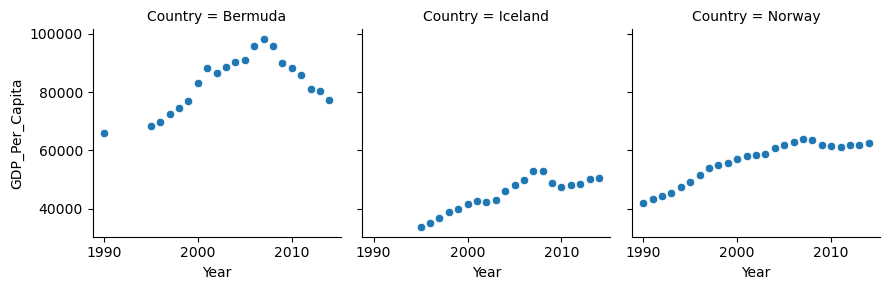

In [94]:
top_int_user_country = sns.FacetGrid(top_country, col='Country')
top_int_user_country.map(sns.scatterplot,'Year', 'GDP_Per_Capita');

#22

In [100]:
gdp_and_internet_user_2014=pd.merge(gdp_df,internet_df,on=['Country','Year'],how='inner')
gdp_and_internet_user_2014 = gdp_and_internet_user_2014[gdp_and_internet_user_2014.Year == 2014]
gdp_and_internet_user_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.384604,6.39
13,Albania,2014,11586.833878,60.10
34,Algeria,2014,11512.690472,18.09
56,Angola,2014,8240.347981,21.26
76,Antigua and Barbuda,2014,18104.683788,64.00
...,...,...,...,...
3308,Uruguay,2014,22419.043746,61.46
3330,Uzbekistan,2014,6075.192224,43.55
3351,Vanuatu,2014,2984.243485,18.80
3371,Zambia,2014,3450.037600,17.34


#23

(0.0, 100.0)

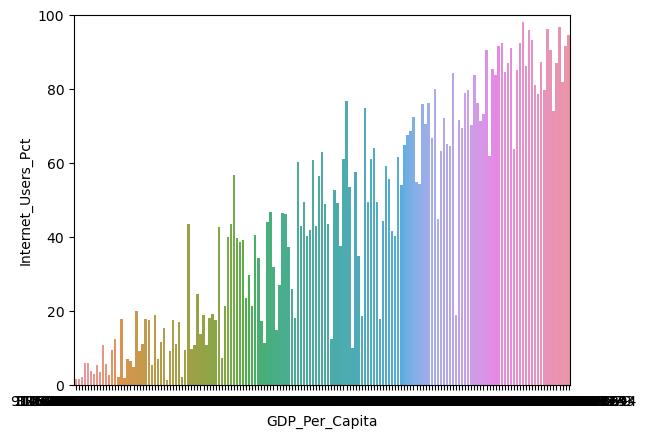

In [101]:
sns.barplot(x=gdp_and_internet_user_2014['GDP_Per_Capita'] ,y=gdp_and_internet_user_2014['Internet_Users_Pct'])
plt.ylim([0,100])

#24

In [102]:
gdp_and_internet_user_2014['GDP_group'] = pd.qcut(gdp_and_internet_user_2014['GDP_Per_Capita'],3,['Low','Medium','High'])

In [103]:
gdp_and_internet_user_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
0,Afghanistan,2014,2102.384604,6.39,Low
13,Albania,2014,11586.833878,60.10,Medium
34,Algeria,2014,11512.690472,18.09,Medium
56,Angola,2014,8240.347981,21.26,Medium
76,Antigua and Barbuda,2014,18104.683788,64.00,Medium
...,...,...,...,...,...
3308,Uruguay,2014,22419.043746,61.46,Medium
3330,Uzbekistan,2014,6075.192224,43.55,Low
3351,Vanuatu,2014,2984.243485,18.80,Low
3371,Zambia,2014,3450.037600,17.34,Low


#25

In [109]:
median_low = np.median((gdp_and_internet_user_2014[gdp_and_internet_user_2014.GDP_group == 'Low']).Internet_Users_Pct)
median_med = np.median((gdp_and_internet_user_2014[gdp_and_internet_user_2014.GDP_group == 'Medium']).Internet_Users_Pct)
median_high = np.median((gdp_and_internet_user_2014[gdp_and_internet_user_2014.GDP_group == 'High']).Internet_Users_Pct)
print('Low:',median_low, '\tMedium:',median_med, '\tHigh:',median_high)

Low: 10.7 	Medium: 43.7 	High: 79.69999999999999
